In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

In [2]:
data=pd.read_csv('./DigitaleMeter_woning.csv',delimiter=';')

In [3]:
data

,Van Datum,Van Tijdstip,Tot Datum,Tot Tijdstip,EAN,Meter,Metertype,Register,Volume,Eenheid,Validatiestatus
0,24-09-2021,00:00:00,24-09-2021,00:15:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Afname Nacht,"0,037",kWh,Gevalideerd
1,24-09-2021,00:00:00,24-09-2021,00:15:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Injectie Nacht,"0,000",kWh,Gevalideerd
2,24-09-2021,00:15:00,24-09-2021,00:30:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Afname Nacht,"0,053",kWh,Gevalideerd
3,24-09-2021,00:15:00,24-09-2021,00:30:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Injectie Nacht,"0,000",kWh,Gevalideerd
4,24-09-2021,00:30:00,24-09-2021,00:45:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Afname Nacht,"0,035",kWh,Gevalideerd
...,...,...,...,...,...,...,...,...,...,...,...
210427,23-09-2024,23:15:00,23-09-2024,23:30:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Injectie Nacht,"0,000",kWh,Gevalideerd
210428,23-09-2024,23:30:00,23-09-2024,23:45:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Afname Nacht,"0,090",kWh,Gevalideerd
210429,23-09-2024,23:30:00,23-09-2024,23:45:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Injectie Nacht,"0,000",kWh,Gevalideerd
210430,23-09-2024,23:45:00,24-09-2024,00:00:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Afname Nacht,"0,083",kWh,Gevalideerd


In [4]:
data['Volume'] = data['Volume'].str.replace(',', '.').astype(float)

In [5]:
data['datetime'] = pd.to_datetime(data['Van Datum'] + ' ' + data['Van Tijdstip'], format='%d-%m-%Y %H:%M:%S')
df_afname = data[data['Register'].str.contains('Afname')].copy()
df_afname.set_index('datetime', inplace=True)
df_afname

,Van Datum,Van Tijdstip,Tot Datum,Tot Tijdstip,EAN,Meter,Metertype,Register,Volume,Eenheid,Validatiestatus
datetime,,,,,,,,,,,
2021-09-24 00:00:00,24-09-2021,00:00:00,24-09-2021,00:15:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Afname Nacht,0.037,kWh,Gevalideerd
2021-09-24 00:15:00,24-09-2021,00:15:00,24-09-2021,00:30:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Afname Nacht,0.053,kWh,Gevalideerd
2021-09-24 00:30:00,24-09-2021,00:30:00,24-09-2021,00:45:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Afname Nacht,0.035,kWh,Gevalideerd
2021-09-24 00:45:00,24-09-2021,00:45:00,24-09-2021,01:00:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Afname Nacht,0.045,kWh,Gevalideerd
2021-09-24 01:00:00,24-09-2021,01:00:00,24-09-2021,01:15:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Afname Nacht,0.048,kWh,Gevalideerd
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23 22:45:00,23-09-2024,22:45:00,23-09-2024,23:00:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Afname Nacht,0.075,kWh,Gevalideerd
2024-09-23 23:00:00,23-09-2024,23:00:00,23-09-2024,23:15:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Afname Nacht,0.073,kWh,Gevalideerd
2024-09-23 23:15:00,23-09-2024,23:15:00,23-09-2024,23:30:00,"=""541448820067028069""",1SAG3100069254,Digitale Meter,Afname Nacht,0.073,kWh,Gevalideerd


## afname per jaar

jaar
1    3638.625
2    2863.949
3    3380.105
Name: Volume, dtype: float64


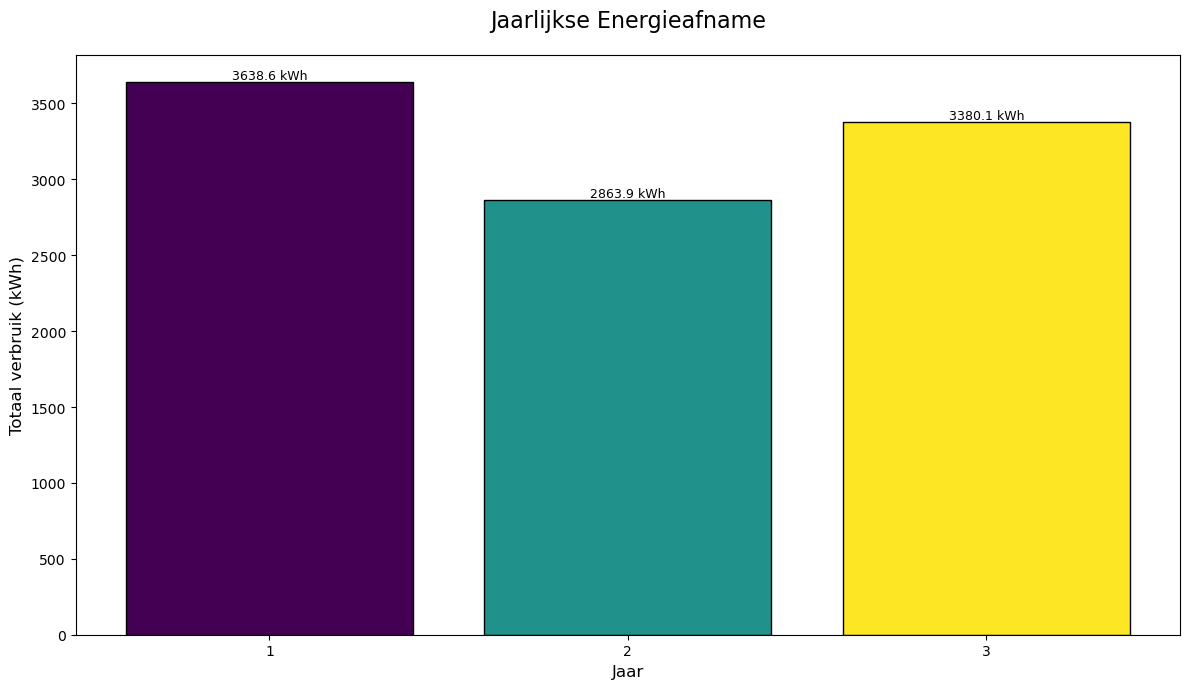

In [6]:
# Controleer op schrikkeljaren
def is_leap(year):
    return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)

def get_year_number(start_date, current_date):
    years = current_date.year - start_date.year
    # Correctie als de huidige datum eerder valt in het jaar dan de startdatum
    if (current_date.month, current_date.day) < (start_date.month, start_date.day):
        years -= 1
    return years + 1  # +1 omdat we tellen vanaf jaar 1

start_date = df_afname.index.min()
df_afname['jaar'] = df_afname.index.to_series().apply(lambda x: get_year_number(start_date, x))

jaarlijkse_afname = df_afname.groupby('jaar')['Volume'].sum()
print(jaarlijkse_afname)

# Plot de resultaten
plt.figure(figsize=(12, 7))  # Iets groter voor betere leesbaarheid
colors = plt.cm.viridis(np.linspace(0, 1, len(jaarlijkse_afname)))  # Verschillende kleuren
bars = plt.bar(jaarlijkse_afname.index, jaarlijkse_afname.values, color=colors, edgecolor='black', linewidth=1, alpha=1)  # Geen transparantie en zwarte rand

# Annotaties boven de bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.5,  # Iets hoger geplaatst
             f'{height:.1f} kWh', ha='center', va='bottom', fontsize=9)  # Kleinere fontsize

plt.title('Jaarlijkse Energieafname', fontsize=16, pad=20)  # Duidelijkere titel
plt.xlabel('Jaar', fontsize=12)
plt.ylabel('Totaal verbruik (kWh)', fontsize=12)
plt.xticks(jaarlijkse_afname.index)  # Jaartallen tonen
plt.tight_layout()  # Voorkomt afsnijden labels
plt.show()

## piekvermogen

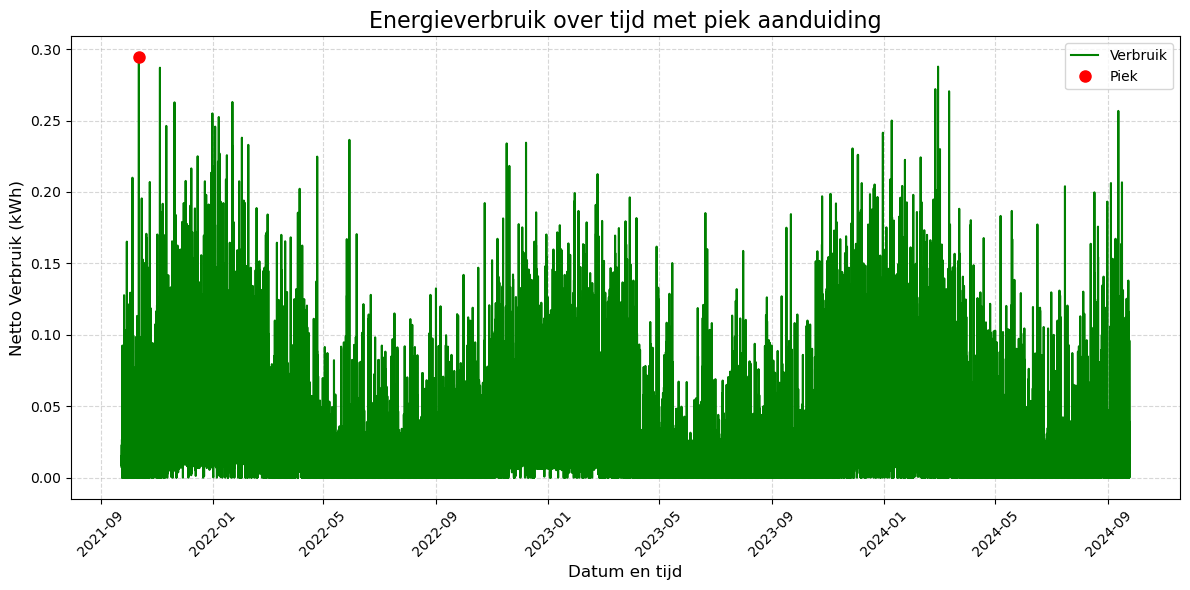

In [7]:
afname_per_datetime = df_afname.groupby('datetime')['Volume'].sum()

# Bereken het netto verbruik
verbruik = afname_per_datetime/4

# Maak een line chart van het netto verbruik
plt.figure(figsize=(12, 6))
plt.plot(verbruik.index, verbruik.values, label='Verbruik', color='green')

# Vind de piekwaarde en het bijbehorende tijdstip
peak_verbruik = verbruik.max()
peak_datetime = verbruik.idxmax()

# Markeer de piek met een rode punt
plt.plot(peak_datetime, peak_verbruik, 'ro', markersize=8, label='Piek')

# Customize the plot
plt.title('Energieverbruik over tijd met piek aanduiding', fontsize=16)
plt.xlabel('Datum en tijd', fontsize=12)
plt.ylabel('Netto Verbruik (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# Show legend
plt.legend()

# Show the plot
plt.show()

In [8]:
# 3. Piekvermogen bepalen
piekvermogen = verbruik.max()
print(f"\nPiekvermogen: {piekvermogen} kW")


Piekvermogen: 0.29425 kW


## maand met grootste verbruik


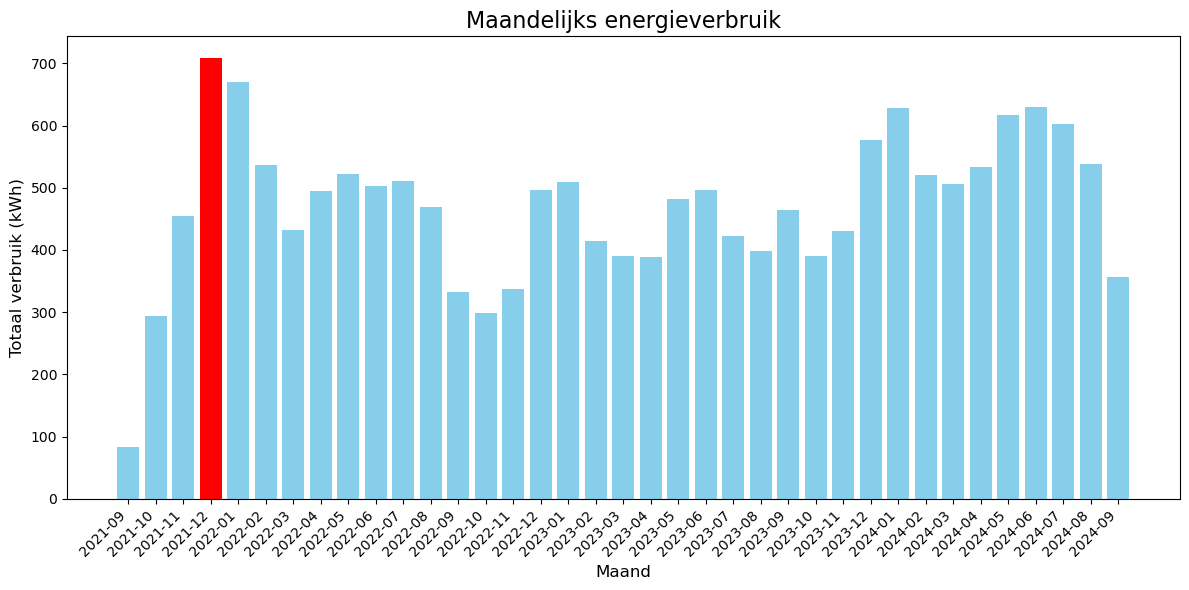

(2021, 12) Jaar  Maand
2021  9         82.873
      10       294.199
      11       455.267
      12       707.991
2022  1        669.325
      2        536.428
      3        431.889
      4        495.215
      5        522.661
      6        502.892
      7        511.452
      8        469.028
      9        332.938
      10       298.688
      11       336.807
      12       495.652
2023  1        508.676
      2        415.050
      3        390.577
      4        388.447
      5        481.071
      6        496.559
      7        423.104
      8        398.303
      9        464.762
      10       390.902
      11       430.444
      12       576.585
2024  1        628.758
      2        519.758
      3        506.061
      4        532.717
      5        616.497
      6        630.491
      7        601.933
      8        538.233
      9        355.755
Name: Volume, dtype: float64


In [11]:

# Voeg een kolom toe voor het jaar en de maand
data['Jaar'] = data['datetime'].dt.year
data['Maand'] = data['datetime'].dt.month

# Bereken het totale verbruik per maand
maandelijks_verbruik = data.groupby(['Jaar', 'Maand'])['Volume'].sum()
# Vind de maand met het grootste verbruik
maand_met_hoogste_verbruik = maandelijks_verbruik.idxmax()

# Maak een bar chart van het verbruik per maand
plt.figure(figsize=(12, 6))
maanden = [f'{jaar}-{maand:02}' for jaar, maand in maandelijks_verbruik.index]
kleuren = ['skyblue'] * len(maanden)  # Standaard kleur voor alle maanden
index_hoogste = maanden.index(f'{maand_met_hoogste_verbruik[0]}-{maand_met_hoogste_verbruik[1]:02}')
kleuren[index_hoogste] = 'red'  # Kleur de maand met het hoogste verbruik rood

plt.bar(maanden, maandelijks_verbruik.values, color=kleuren)
plt.xlabel('Maand', fontsize=12)
plt.ylabel('Totaal verbruik (kWh)', fontsize=12)
plt.title('Maandelijks energieverbruik', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(maand_met_hoogste_verbruik,maandelijks_verbruik)

## maand met grootste piek

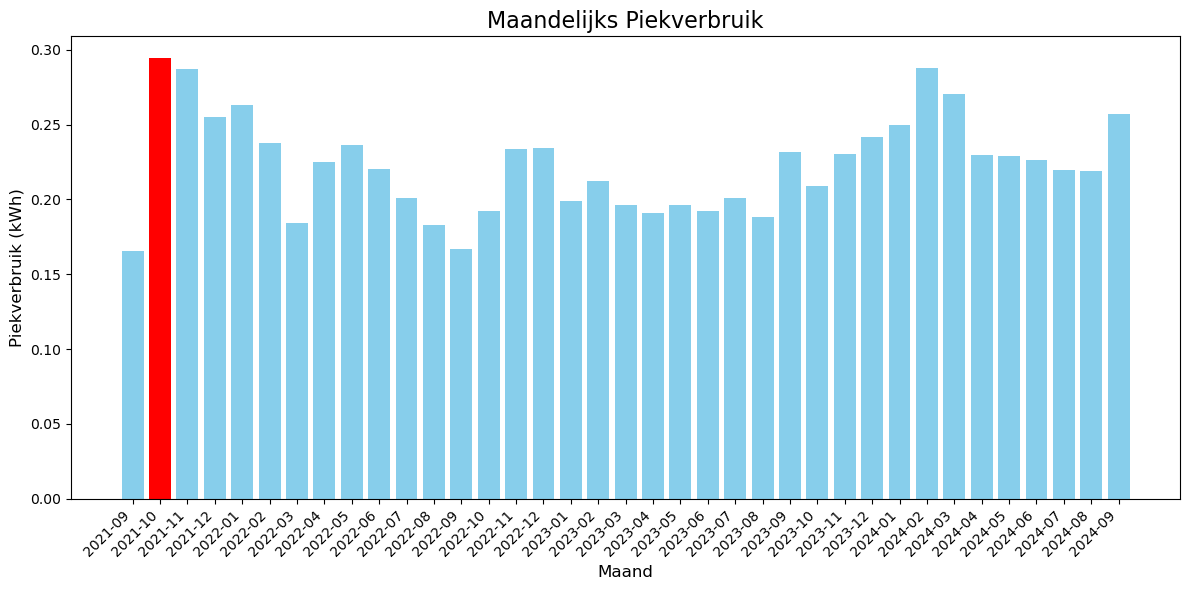

De maand met de grootste piekverbruik is: (2021, 10)
Jaar  Maand
2021  9        0.16525
      10       0.29425
      11       0.28700
      12       0.25500
2022  1        0.26300
      2        0.23800
      3        0.18425
      4        0.22475
      5        0.23650
      6        0.22050
      7        0.20100
      8        0.18275
      9        0.16700
      10       0.19225
      11       0.23400
      12       0.23450
2023  1        0.19925
      2        0.21250
      3        0.19625
      4        0.19100
      5        0.19625
      6        0.19225
      7        0.20125
      8        0.18825
      9        0.23175
      10       0.20925
      11       0.23050
      12       0.24150
2024  1        0.25000
      2        0.28775
      3        0.27050
      4        0.22950
      5        0.22900
      6        0.22625
      7        0.21950
      8        0.21900
      9        0.25675
Name: Volume, dtype: float64


In [15]:
# Bereken de piekverbruik per maand
maandelijkse_pieken = data.groupby(['Jaar', 'Maand'])['Volume'].max()/4

# Vind de maand met de grootste piekverbruik
maand_met_grootste_piek = maandelijkse_pieken.idxmax()

# Maak een bar chart van de piekverbruiken per maand
plt.figure(figsize=(12, 6))
maanden = [f'{jaar}-{maand:02}' for jaar, maand in maandelijkse_pieken.index]
kleuren = ['skyblue'] * len(maanden)  # Standaard kleur voor alle maanden
index_hoogste = maanden.index(f'{maand_met_grootste_piek[0]}-{maand_met_grootste_piek[1]:02}')
kleuren[index_hoogste] = 'red'  # Kleur de maand met de hoogste piek rood

plt.bar(maanden, maandelijkse_pieken.values, color=kleuren)
plt.xlabel('Maand', fontsize=12)
plt.ylabel('Piekverbruik (kWh)', fontsize=12)
plt.title('Maandelijks Piekverbruik', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"De maand met de grootste piekverbruik is: {maand_met_grootste_piek}")
print(maandelijkse_pieken)

## jaarlijks energie injectie

jaar
1    2299.477
2    2198.445
3    3057.387
Name: Volume, dtype: float64


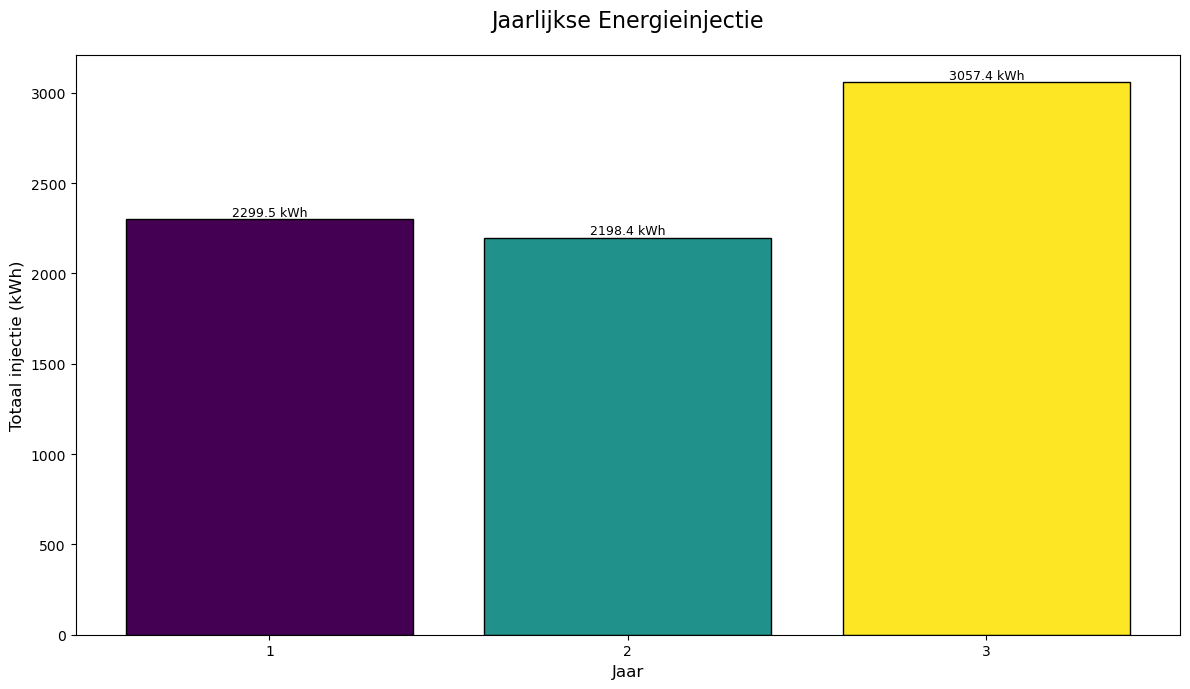

In [17]:
# Filter de injectie data
df_injectie = data[data['Register'].str.contains('Injectie')].copy()

# Zet de datetime als index
df_injectie.set_index('datetime', inplace=True)

# Controleer op schrikkeljaren
def is_leap(year):
    return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)

def get_year_number(start_date, current_date):
    years = current_date.year - start_date.year
    # Correctie als de huidige datum eerder valt in het jaar dan de startdatum
    if (current_date.month, current_date.day) < (start_date.month, start_date.day):
        years -= 1
    return years + 1  # +1 omdat we tellen vanaf jaar 1

start_date = df_injectie.index.min()
df_injectie['jaar'] = df_injectie.index.to_series().apply(lambda x: get_year_number(start_date, x))

jaarlijkse_injectie = df_injectie.groupby('jaar')['Volume'].sum()
print(jaarlijkse_injectie)

# Plot de resultaten
plt.figure(figsize=(12, 7)) 
colors = plt.cm.viridis(np.linspace(0, 1, len(jaarlijkse_injectie)))  # Verschillende kleuren
bars = plt.bar(jaarlijkse_injectie.index, jaarlijkse_injectie.values, color=colors, edgecolor='black', linewidth=1, alpha=1)  

# Annotaties boven de bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.5, 
             f'{height:.1f} kWh', ha='center', va='bottom', fontsize=9)

plt.title('Jaarlijkse Energieinjectie', fontsize=16, pad=20)
plt.xlabel('Jaar', fontsize=12)
plt.ylabel('Totaal injectie (kWh)', fontsize=12)
plt.xticks(jaarlijkse_injectie.index)  # Jaartallen tonen
plt.tight_layout()
plt.show()

## gemiddelde dag profiel van weekdagen en weekend-dagen

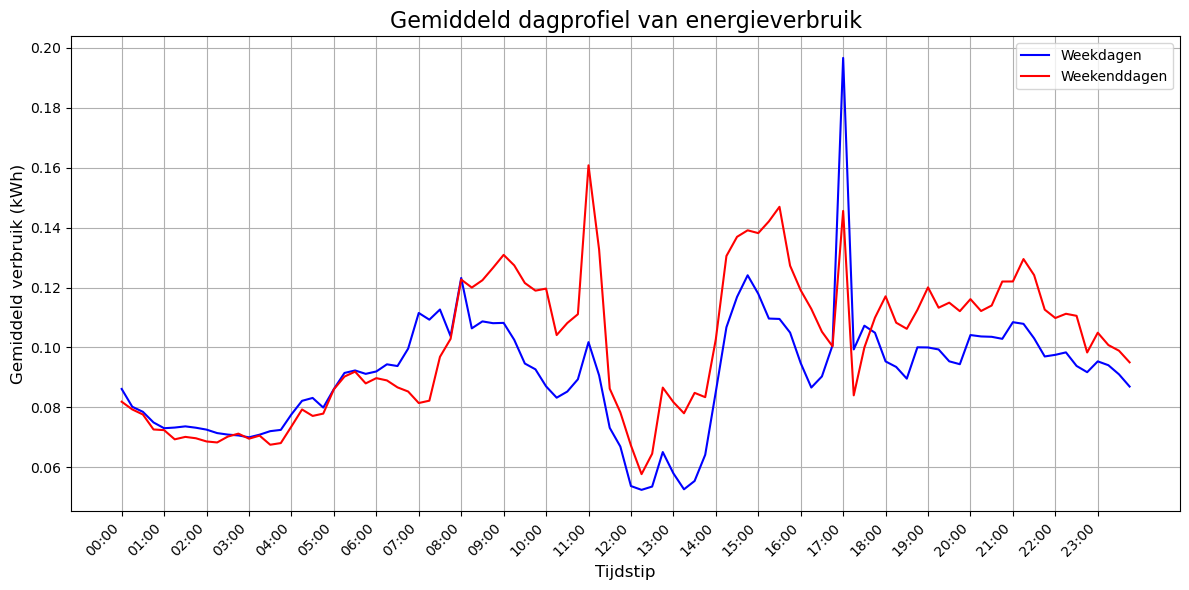

In [66]:
df_afname['dag_van_de_week'] = df_afname.index.day_name()

weekdagen = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekenddagen = ['Saturday', 'Sunday']

# Filter weekdag en weekenddata
df_weekdagen = df_afname[df_afname['dag_van_de_week'].isin(weekdagen)]
df_weekenddagen = df_afname[df_afname['dag_van_de_week'].isin(weekenddagen)]

# Bereken het gemiddelde verbruik per kwartier voor weekdagen
gemiddeld_weekdag_profiel = df_weekdagen.groupby(df_weekdagen.index.time)['Volume'].mean()

# Bereken het gemiddelde verbruik per kwartier voor weekenddagen
gemiddeld_weekenddag_profiel = df_weekenddagen.groupby(df_weekenddagen.index.time)['Volume'].mean()

plt.figure(figsize=(12, 6))

x = range(len(gemiddeld_weekdag_profiel))

plt.plot(x, gemiddeld_weekdag_profiel.values, label='Weekdagen', color='blue')
plt.plot(x, gemiddeld_weekenddag_profiel.values, label='Weekenddagen', color='red')

uur_ticks = list(range(0, 96, 4))
uur_labels = [f"{h:02d}:00" for h in range(24)]

plt.xticks(uur_ticks, uur_labels, rotation=45, ha='right')

plt.xlabel('Tijdstip', fontsize=12)
plt.ylabel('Gemiddeld verbruik (kWh)', fontsize=12)
plt.title('Gemiddeld dagprofiel van energieverbruik', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

## Ilustreer a.d.h.v. een heatmap de dagen van de week en kwartier-momenten van de dag met hoogste verbruik

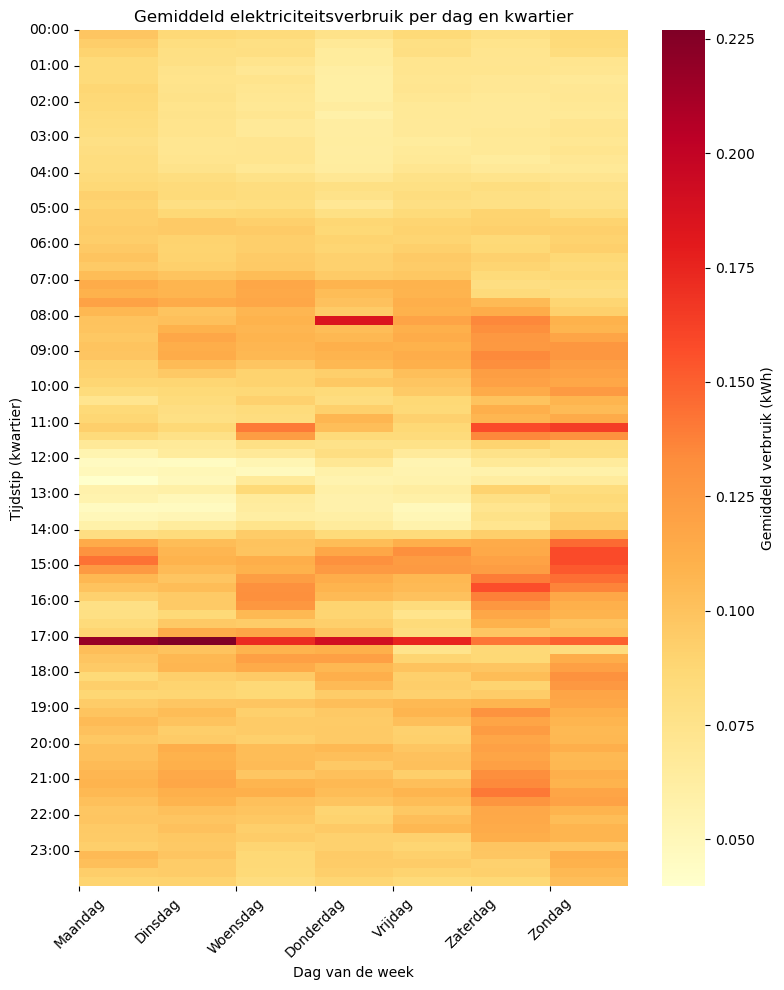

In [59]:
import seaborn as sns
consumptie = data[data['Register'].str.startswith('Afname')].copy()

# Tijdseenheden extraheren
consumptie['Dag_van_week'] = consumptie['datetime'].dt.dayofweek
consumptie['Kwartier'] = consumptie['datetime'].dt.strftime('%H:%M')

# Aggregatie per tijdseenheid
heatmap_data = consumptie.groupby(['Dag_van_week', 'Kwartier'])['Volume'].mean().reset_index()

# # Pivot tabel voor heatmap
# pivot_tabel = heatmap_data.pivot(index='Dag_van_week', columns='Kwartier', values='Volume')
# pivot_tabel = pivot_tabel.reindex(columns=sorted(pivot_tabel.columns))

# # Transpose van de pivot tabel voor as-verwisseling
plt.figure(figsize=(8,10))
sns.heatmap(pivot_tabel.T, cmap='YlOrRd', cbar_kws={'label': 'Gemiddeld verbruik (kWh)'})

# Aangepaste aslabels
dagen = ['Maandag', 'Dinsdag', 'Woensdag', 'Donderdag', 'Vrijdag', 'Zaterdag', 'Zondag']
kwartieren = sorted(consumptie['Kwartier'].unique())

plt.xticks(ticks=range(7), labels=dagen, rotation=45)
plt.yticks(ticks=range(0, 96, 4), labels=[f"{h:02d}:00" for h in range(24)], rotation=0)
plt.xlabel('Dag van de week')
plt.ylabel('Tijdstip (kwartier)')
plt.title('Gemiddeld elektriciteitsverbruik per dag en kwartier')
plt.tight_layout()
